In [13]:
#importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


LENET-5


In [14]:
# Define LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # Input: 28x28x1 -> Output: 28x28x6
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)  # Input: 28x28x6 -> Output: 14x14x6
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)  # Input: 14x14x6 -> Output: 10x10x16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # Input: Flattened 16*5*5 -> Output: 120
        self.fc2 = nn.Linear(120, 84)  # Input: 120 -> Output: 84
        self.fc3 = nn.Linear(84, num_classes)  # Input: 84 -> Output: num_classes

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Data Transformations and MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


MNIST

Epoch [1/20], Loss: 0.2950
Test Accuracy of the model on the 10000 test images: 97.24%
Epoch [2/20], Loss: 0.0789
Test Accuracy of the model on the 10000 test images: 98.29%
Epoch [3/20], Loss: 0.0560
Test Accuracy of the model on the 10000 test images: 98.71%
Epoch [4/20], Loss: 0.0444
Test Accuracy of the model on the 10000 test images: 98.81%
Epoch [5/20], Loss: 0.0360
Test Accuracy of the model on the 10000 test images: 98.83%
Epoch [6/20], Loss: 0.0323
Test Accuracy of the model on the 10000 test images: 99.06%
Epoch [7/20], Loss: 0.0277
Test Accuracy of the model on the 10000 test images: 98.95%
Epoch [8/20], Loss: 0.0247
Test Accuracy of the model on the 10000 test images: 99.11%
Epoch [9/20], Loss: 0.0216
Test Accuracy of the model on the 10000 test images: 99.20%
Epoch [10/20], Loss: 0.0186
Test Accuracy of the model on the 10000 test images: 99.09%
Epoch [11/20], Loss: 0.0084
Test Accuracy of the model on the 10000 test images: 99.33%
Epoch [12/20], Loss: 0.0065
Test Accuracy

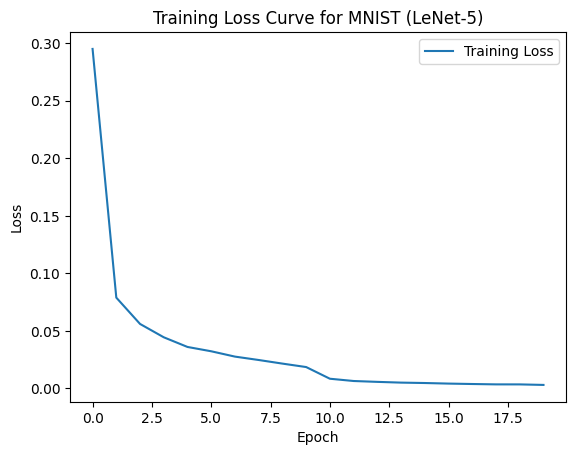

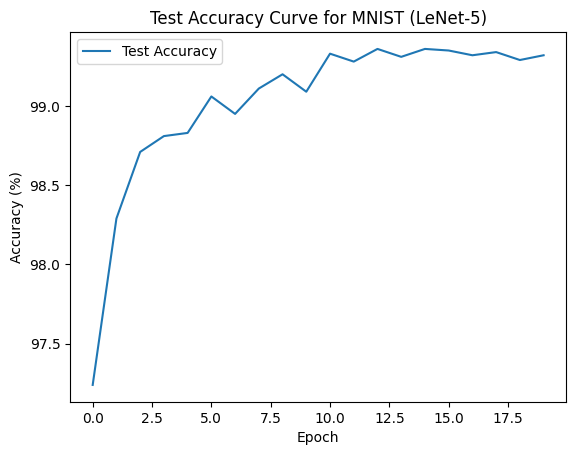

In [15]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize Model, Loss Function, Optimizer
model = LeNet5(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

# Training and Evaluation
num_epochs = 20
train_loss_list = []
test_accuracy_list = []

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_loss_list.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')


    # Testing
    model.eval()
    correct = 0
    total = 0
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    test_accuracy_list.append(accuracy)
    print(f'Test Accuracy of the model on the 10000 test images: {accuracy:.2f}%')

    scheduler.step()


# Final Metrics Calculation
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print Final Metrics
print("\nFinal Metrics for MNIST using LeNet-5:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot Training Loss Curve
plt.figure()
plt.plot(train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve for MNIST (LeNet-5)')
plt.legend()
plt.show()

# Plot Test Accuracy Curve
plt.figure()
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Curve for MNIST (LeNet-5)')
plt.legend()
plt.show()










FMNIST

Epoch [1/20], Loss: 0.6252
Test Accuracy of the model on the 10000 test images: 83.32%
Epoch [2/20], Loss: 0.4040
Test Accuracy of the model on the 10000 test images: 86.32%
Epoch [3/20], Loss: 0.3467
Test Accuracy of the model on the 10000 test images: 86.42%
Epoch [4/20], Loss: 0.3143
Test Accuracy of the model on the 10000 test images: 86.99%
Epoch [5/20], Loss: 0.2941
Test Accuracy of the model on the 10000 test images: 88.28%
Epoch [6/20], Loss: 0.2751
Test Accuracy of the model on the 10000 test images: 88.66%
Epoch [7/20], Loss: 0.2613
Test Accuracy of the model on the 10000 test images: 89.35%
Epoch [8/20], Loss: 0.2457
Test Accuracy of the model on the 10000 test images: 89.49%
Epoch [9/20], Loss: 0.2337
Test Accuracy of the model on the 10000 test images: 90.24%
Epoch [10/20], Loss: 0.2232
Test Accuracy of the model on the 10000 test images: 90.31%
Epoch [11/20], Loss: 0.2123
Test Accuracy of the model on the 10000 test images: 90.29%
Epoch [12/20], Loss: 0.2018
Test Accuracy

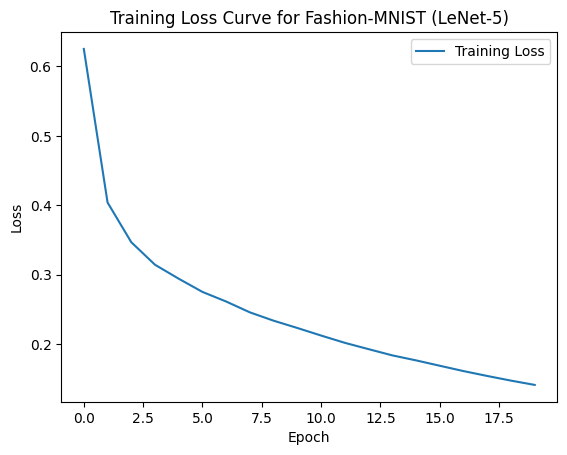

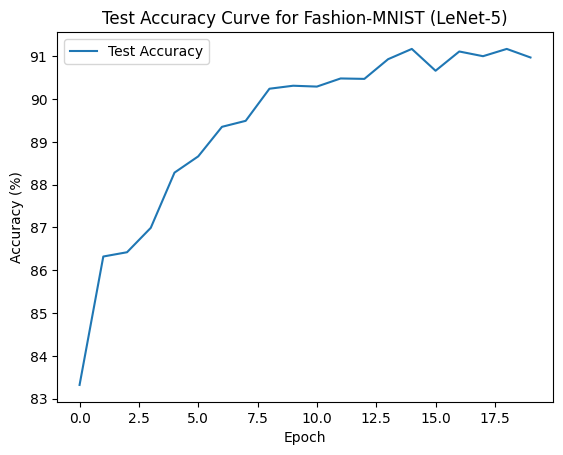

In [16]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize Model, Loss Function, Optimizer
model = LeNet5(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

# Training and Evaluation
num_epochs = 20
train_loss_list = []
test_accuracy_list = []

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_loss_list.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')


    # Testing
    model.eval()
    correct = 0
    total = 0
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    test_accuracy_list.append(accuracy)
    print(f'Test Accuracy of the model on the 10000 test images: {accuracy:.2f}%')


# Final Metrics Calculation
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print Final Metrics
print("\nFinal Metrics for Fashion-MNIST using LeNet-5:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot Training Loss Curve
plt.figure()
plt.plot(train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve for Fashion-MNIST (LeNet-5)')
plt.legend()
plt.show()

# Plot Test Accuracy Curve
plt.figure()
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Curve for Fashion-MNIST (LeNet-5)')
plt.legend()
plt.show()

CIFAR-10

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/20], Loss: 1.6707
Test Accuracy of the model on the 10000 test images: 46.57%
Epoch [2/20], Loss: 1.4140
Test Accuracy of the model on the 10000 test images: 50.60%
Epoch [3/20], Loss: 1.2998
Test Accuracy of the model on the 10000 test images: 54.99%
Epoch [4/20], Loss: 1.2102
Test Accuracy of the model on the 10000 test images: 56.28%
Epoch [5/20], Loss: 1.1390
Test Accuracy of the model on the 10000 test images: 59.13%
Epoch [6/20], Loss: 1.0743
Test Accuracy of the model on the 10000 test images: 58.98%
Epoch [7/20], Loss: 1.0252
Test Accuracy of the model on the 10000 test images: 60.97%
Epoch [8/20], Loss: 0.9791
Test Accuracy of the model on the 10000 test images: 61.69%
Epoch [9/20], Loss: 0.9344
Test Accuracy of the model on the 10000 test images: 62.56%
Epoch [10/20], Loss: 0.8965
Test Accuracy of the model on the 10000 test images: 62.50%
Epoch [11/20], Loss: 0.8611
Test Accuracy of the mode

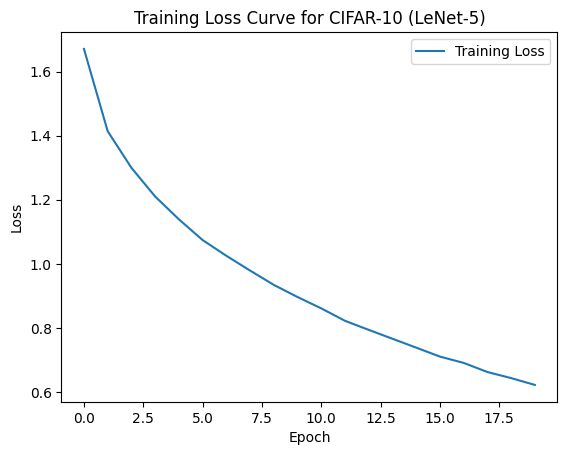

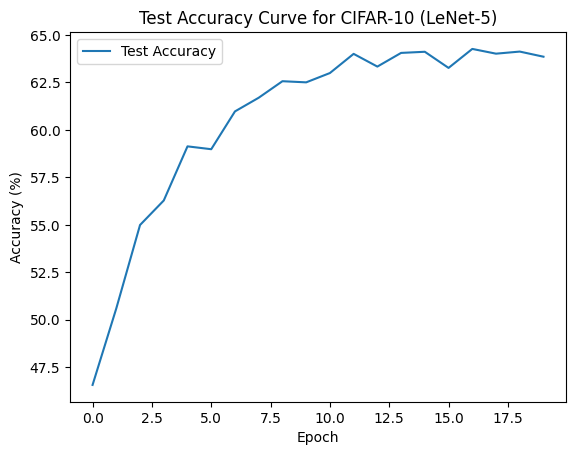

In [11]:
class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
        super(LeNet5, self).__init__()
        # Adjusted input channels to 3 (for RGB images)
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=2)  # Input: 32x32x3 -> Output: 32x32x6
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)  # Input: 32x32x6 -> Output: 16x16x6
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)  # Input: 16x16x6 -> Output: 12x12x16
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # Flattened Input: 16*6*6 -> Output: 120
        self.fc2 = nn.Linear(120, 84)  # Input: 120 -> Output: 84
        self.fc3 = nn.Linear(84, num_classes)  # Input: 84 -> Output: num_classes

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize Model, Loss Function, Optimizer
model = LeNet5(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler= StepLR(optimizer, step_size=10, gamma=0.1)


# Training and Evaluation
num_epochs = 20
train_loss_list = []
test_accuracy_list = []

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_loss_list.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')


    # Testing
    model.eval()
    correct = 0
    total = 0
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    test_accuracy_list.append(accuracy)
    print(f'Test Accuracy of the model on the 10000 test images: {accuracy:.2f}%')


# Final Metrics Calculation
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print Final Metrics
print("\nFinal Metrics for CIFAR-10 using LeNet-5:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot Training Loss Curve
plt.figure()
plt.plot(train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve for CIFAR-10 (LeNet-5)')
plt.legend()
plt.show()

# Plot Test Accuracy Curve
plt.figure()
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Curve for CIFAR-10 (LeNet-5)')
plt.legend()
plt.show()